In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q keras

In [5]:
import keras

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Dense, 
from keras.layers import Conv2D, 
from keras.layers import MaxPool2D,
from keras.layers import Dropout,
from keras.layers import Flatten,
from keras.layers import BatchNormalization, 
from keras.layers import ZeroPadding2D
from keras.models import Sequential
from keras.preprocessing import image

In [7]:
trgen=image.ImageDataGenerator(rescale=1/255)
vagen=image.ImageDataGenerator(rescale=1/255)
traindata=trgen.flow_from_directory('/content/drive/MyDrive/coronalung/train',
                                         target_size=(256,256),batch_size=2)
valdata=vagen.flow_from_directory("/content/drive/MyDrive/coronalung/test",
                                         target_size=(256,256),batch_size=16,class_mode='binary')

Found 151 images belonging to 1 classes.
Found 151 images belonging to 1 classes.


In [8]:
model=Sequential()
import tensorflow as tf

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.75))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
k=model.fit_generator(data_train,steps_per_epoch=50,epochs=50,validation_data=data_val)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 61s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 59s 1s/step - loss: 3.0706e-33 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 60s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 60s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 59s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 62s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 144.3197 - val_accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 58s 1s/step - loss: 5.5786e-36 - accuracy: 1.0000 - val_los

In [25]:
k1=k.history

In [27]:
k1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

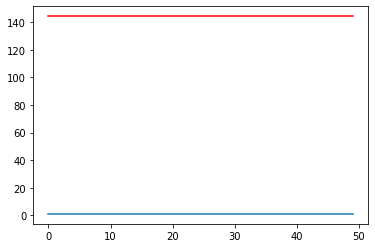

In [31]:
plt.plot(k1['accuracy'])
plt.plot(k1['val_loss'],c="red")
plt.show()

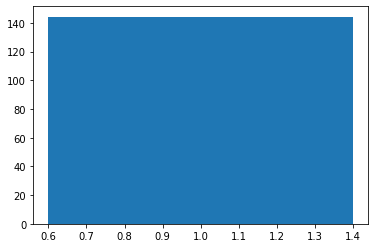

In [33]:
plt.bar(k1['accuracy'],k1['val_loss'])
plt.show()